## Transmission Spectrum
波導腔的傳輸和諧振模式

為了計算透射光譜，測量波導一端從另一端源的通量光譜   
先import

In [1]:
import meep as mp
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Video
import IPython
#%matplotlib notebook

## 定義參數
都以mu為單位  
photonic crystal的週期為1mu

In [29]:
resolution = 20   # pixels/um 解析度

eps = 13          # (epslion)dielectric constant of waveguide 
w = 1.2           # width of waveguide
r = 0.36          # radius of holes
d = 1.4           # defect spacing (ordinary spacing = 1)
N = 3             # number of holes on either side of defect

sy = 6            # size of cell in y direction (perpendicular to wvg.)
pad = 2           # padding between last hole and PML edge
dpml = 1          # PML thickness

給定參數

In [30]:
sx = 2*(pad+dpml+N)+d-1  # size of cell in x direction

In [31]:
cell = mp.Vector3(sx,sy,0)

In [32]:
blk = mp.Block(size=mp.Vector3(mp.inf,w,mp.inf), material=mp.Medium(epsilon=eps))
geometry = [blk]

for i in range(N):
        geometry.append(mp.Cylinder(r, center=mp.Vector3(d/2+i)))
        geometry.append(mp.Cylinder(r, center=mp.Vector3(-(d/2+i))))

for 迴圈去放入孔洞

吸收邊界

In [33]:
pml_layers = [mp.PML(1.0)]

從之前的計算 頻率參數 在 f0.2~0.3之間有𝐻𝑧 -polarized band gap 所以直接覆蓋整個區間

In [34]:
fcen = 0.25   # pulse center frequency 75THz
df = 0.2       # pulse frequency width 60THz

source是一個Gaussian pulse center 在fcen   
位置在PML外的邊緣x = - 0.5 * sx + dpml  
重點在p(平行)極化 所以要用𝐽𝑦  current source激發  
指定𝐸𝑦

In [35]:
src = [mp.Source(mp.GaussianSource(fcen, fwidth=df),
                 component=mp.Ey,
                 center=mp.Vector3(-0.5*sx+dpml),
                 size=mp.Vector3(0,w))]

原結構為XY皆對稱  
source打破了 Y方向的對稱  
但Z方向依舊有奇對秤

In [36]:
sym = [mp.Mirror(mp.Y, phase=-1)]

用Y作法線來指定平面  
sim放入物件

In [37]:
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry,
                    boundary_layers=pml_layers,
                    sources=src,
                    symmetries=sym,
                    resolution=resolution)

再設立一個接收區 計算  
在PML前但在孔洞後

In [38]:
freg = mp.FluxRegion(center=mp.Vector3(0.5*sx-dpml-0.5),
                     size=mp.Vector3(0,2*w))

nfreq = 500 # number of frequencies at which to compute flux 計算頻率數

# transmitted flux
trans = sim.add_flux(fcen, df, nfreq, freg)

最後 show 出圖可以確定是否打錯

     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (1.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-1.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (2.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-2.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant eps

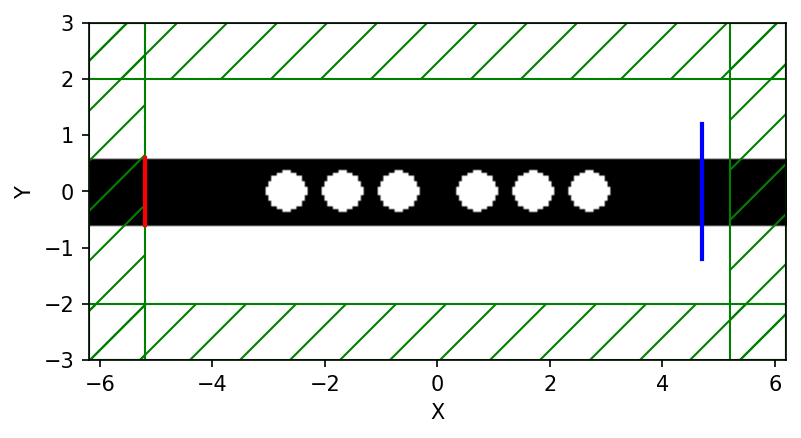

In [39]:
f = plt.figure(dpi=150)
sim.plot2D(ax=f.gca())
plt.show()

接下來 跑simulation  
以及設定停止的時間stop_when_fields_decayed 50個時間為單位  
直到|Ey|^2(方向)衰減至1/1000

In [13]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

colors = ["darkslateblue","blue", "black", "red","yellow"]#相對應的顏色
nodes = [0.0,0.2, 0.5, 0.7,1.0]# 波0~1(MAX)相對應的值轉換顏色
mycmap = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))#線性變化顏色
def modu_f(fd):
    output = np.sign(fd) * np.abs(fd) ** 0.7
    return output
f = plt.figure(dpi=150)
animate = mp.Animate2D(sim, fields=mp.Hz, f=f, realtime=False, normalize=True
                       ,field_parameters={'post_process':modu_f,'alpha':1, 'cmap':mycmap}
                       ,source_parameters={'alpha':1,'color':'white','linewidth':0.5,'hatch':''})
sim.run(mp.during_sources(mp.at_every(0.4, animate)),
            until_after_sources=
        mp.stop_when_fields_decayed(50, mp.Ey, mp.Vector3(0.5*sx-dpml-0.5), 1e-4))
plt.close()

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.00176501 s
Working in 2D dimensions.
Computational cell is 12.4 x 6 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (1.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-1.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (2.7,0,0)
          radius 0.36

In [14]:
filename = 'hole-wvg-cavity.mp4'
animate.to_mp4(10,filename)
Video(filename)

Generating MP4...


可以看到pulse向右傳遞 碰到孔洞反彈 在cavity中諧振 長時間在中心後向右洩漏出去  
重點是要得到透射光譜 要simulation無孔洞的才可計算

In [15]:
def sim_cavity(N=3,sy=6):
    sx = 2*(pad+dpml+N)+d-1  # size of cell in x direction
    cell = mp.Vector3(sx,sy,0)
    blk = mp.Block(size=mp.Vector3(mp.inf,w,mp.inf), 
                   material=mp.Medium(epsilon=eps))
    geometry = [blk]

    for i in range(N):
            geometry.append(mp.Cylinder(r, center=mp.Vector3(d/2+i)))
            geometry.append(mp.Cylinder(r, center=mp.Vector3(-(d/2+i))))
    
    src = [mp.Source(mp.GaussianSource(fcen, fwidth=df),
                 component=mp.Ey,
                 center=mp.Vector3(-0.5*sx+dpml),
                 size=mp.Vector3(0,w))]
    
    sim = mp.Simulation(cell_size=cell,
                    geometry=geometry,
                    boundary_layers=pml_layers,
                    sources=src,
                    symmetries=sym,
                    resolution=resolution)
    
    freg = mp.FluxRegion(center=mp.Vector3(0.5*sx-dpml-0.5),
                     size=mp.Vector3(0,2*w))
    nfreq = 500
    trans = sim.add_flux(fcen, df, nfreq, freg)
    
    sim.run(until_after_sources=
            mp.stop_when_fields_decayed(50, mp.Ey,
                                        mp.Vector3(0.5*sx-dpml-0.5), 1e-3))
    
    freqs = mp.get_flux_freqs(trans)
    psd = mp.get_fluxes(trans)

    return freqs, psd

N=0無孔洞 N=3(對稱)孔洞

In [16]:
freqs_wg, psd_wg = sim_cavity(N=0) # simple waveguide
freqs_cav, psd_cav = sim_cavity() # cavity

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.000799894 s
Working in 2D dimensions.
Computational cell is 6.4 x 6 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
time for set_epsilon = 0.0115888 s
-----------
field decay(t = 50.025000000000006): 0.024304124551377634 / 0.024304124551377634 = 1.0
field decay(t = 100.05000000000001): 0.0002947877364436866 / 0.024304124551377634 = 0.012129123837417839
field decay(t = 150.07500000000002): 8.914669648695207e-14 / 0.024304124551377634 = 3.667965752006441e-12
run 0 finished at t = 150.07500000000002 (6003 timesteps)
-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.00119305 s
Working in 2D dimensions.
Computational cell is 12.4 x 6 x 0 with resolution 20
     block, center

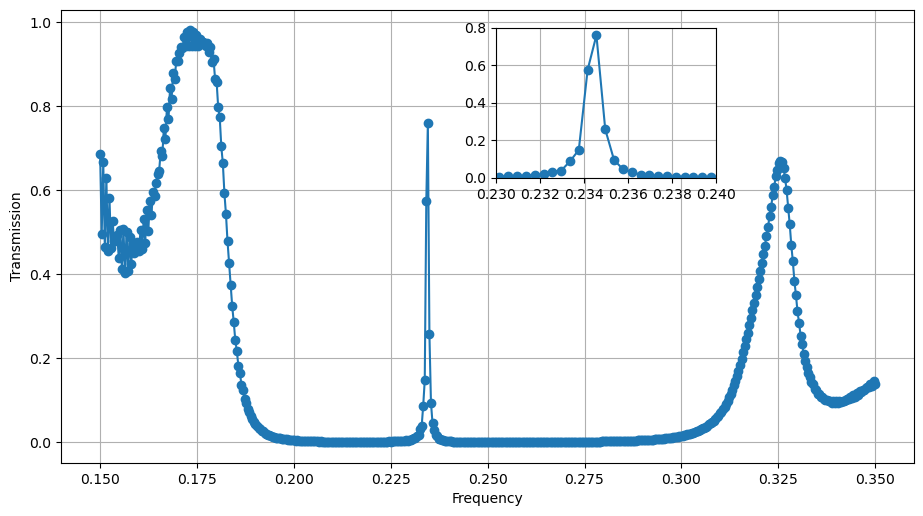

In [17]:
fig = plt.figure(figsize=(11,6),dpi=100)
ax = fig.add_subplot(111)
plt.plot(freqs_cav,np.array(psd_cav)/np.array(psd_wg),'o-')
plt.grid(True)
plt.xlabel('Frequency')
plt.ylabel('Transmission')

ax2 = fig.add_axes([0.52, 0.6, 0.2, 0.25])
plt.plot(freqs_cav,np.array(psd_cav)/np.array(psd_wg),'o-')
plt.xlim(0.23,0.24)
plt.ylim(0,0.8)
plt.grid(True)

band gap區域可以清楚看到 中間有一個peak 對應到困在 defect 裡的諧振  
插圖放大peak 可以看出沒有足夠的點去描畫出整個形狀 但可以用Lorentzian去算出來  
在band gap 邊緣 傳輸量上升 下方會研究  
圖的左側還有一些高頻震盪 是一些數值偽影  
因為在那段數值脈衝沒有達到足夠的強度  

共振峰越窄Q值越高 直接的傳輸模擬就越難執行  
因為傅立葉的不確定性原理 我們需要運行的時間取決於我們想要獲得的頻率精準度  
幸運的是 有比較好的方式來研究高Q 如下 (以及Ring Resonator)

## Resonant Modes
要研究high-Q諧振 直接激發更有效率 將source置於cavity內 並分析獲得 場的lifetime和頻率  
這裡是為上述結構續做(可以參考Ring Resonator)  

結構基本相同 source和分析不同 新function來參數化模擬  

一樣用Gaussian 但是是在原點用點Gaussian z 方向的磁流( 𝐻𝑧 )  
𝐻𝑧 極化諧振模式的對稱性相匹配  
若事先不知道是何種對稱 將source放在非對稱遠離原點的地方 激發所有模態  
個問題中有兩個鏡像對稱平面的事實 從而為我們節省了四倍計算

In [18]:
def sim_cavity(N=3,sy=6,fcen=0.25,df=0.2):
    sx = 2*(pad+dpml+N)+d-1  # size of cell in x direction
    cell = mp.Vector3(sx,sy,0)
    blk = mp.Block(size=mp.Vector3(mp.inf,w,mp.inf), 
                   material=mp.Medium(epsilon=eps))
    geometry = [blk]

    for i in range(N):
            geometry.append(mp.Cylinder(r, center=mp.Vector3(d/2+i)))
            geometry.append(mp.Cylinder(r, center=mp.Vector3(-(d/2+i))))
    
    src = [mp.Source(mp.GaussianSource(fcen, fwidth=df), mp.Hz, mp.Vector3(0))]
    
    sym = [mp.Mirror(mp.Y, phase=-1), mp.Mirror(mp.X, phase=-1)]
    
    sim = mp.Simulation(cell_size=cell,
                    geometry=geometry,
                    boundary_layers=pml_layers,
                    sources=src,
                    symmetries=sym,
                    resolution=resolution)
    
    return sim

上方的X和Y都乘上了-1 微妙之處在於 磁場是一個贗向量 所以不會跟鏡像一起旋轉  
所以要在乘上一個-1 才可以使其回歸正常

     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (1.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-1.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (2.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-2.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant eps

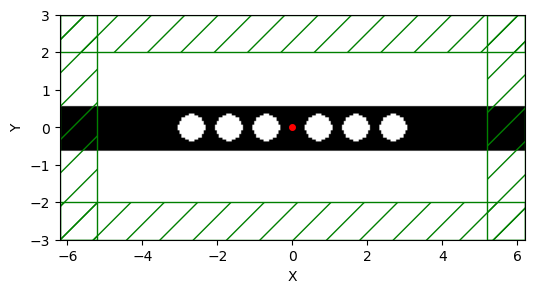

In [19]:
sim = sim_cavity()
f = plt.figure(dpi=100)
sim.plot2D(ax=f.gca())
plt.show()

跑動畫  
在Tutorial/Basics/Modes of a Ring Resonator 使用 harminv 命令  
來分析源關閉後一段時間內某個點的響應(這裡是Hz在原點的磁場)  

Harminv 是一個解決 harmonic inversion 問題的程序  
給定一個離散的、有限長度的信號 該信號由有限多個正弦曲線的總和組成  
它決定了這些正弦曲線的頻率、衰減常數、幅度和相位  
提供比直接基於 FFT 的方法更好的精度，主要是因為它為信號採用了特定的形式  
"filter diagonalization method" (FDM)來尋找給定頻率間隔附近的正弦波


從物理上知道您的系統由感興趣的bandwidth內的少量衰減和振盪模式以及有限數量的噪聲組成，並且不適合分析完全任意波形時，這很有用

In [20]:
h = mp.Harminv(mp.Hz, mp.Vector3(), fcen, df)
sim.run(mp.after_sources(h),
        until_after_sources=400)

f = plt.figure(dpi=150)
animate = mp.Animate2D(sim,f=f,fields=mp.Hz,realtime=False,normalize=True)

sim.run(mp.at_every(1/fcen/20, animate), until=1/fcen)
plt.close()

-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00325799 s
Working in 2D dimensions.
Computational cell is 12.4 x 6 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (1.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-1.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylin

FloatProgress(value=0.0, description='0% done ', max=450.0)

harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 0.23445415346007015, -0.0003147812367402145, 372.4080823368176, 5.8121430334745385, -3.7631074858799107-4.429450156766772i, 4.306877278522053e-09+0.0i
run 0 finished at t = 450.0 (18000 timesteps)


FloatProgress(value=450.0, description='0% done ', max=454.0, min=450.0)

     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (1.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-1.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (2.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-2.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant eps

In [21]:
filename = 'hole-wvg-cavity-res.mp4'
animate.to_mp4(10,filename)
Video(filename)

Generating MP4...


檢查動畫，我們在間隙中看到一個單一的共振模式  
我們可以通過拉取 Harminv 結果來驗證這一點：

In [22]:
f = [m.freq for m in h.modes]
Q = [m.Q for m in h.modes]

for fiter, qiter in zip(f, Q):
    print(f'Resonant frequency: {fiter}, Q: {qiter}') 

Resonant frequency: 0.23445415346007015, Q: 372.4080823368176


該模式的頻率為 0.234(70.5) 也可以通過擬合透射光譜找到 372 的 𝑄  
𝑄 包括兩個獨立的衰減通道  
光可以從腔體衰減到波導中 為 𝑄𝑤  
或者它可以從腔體輻射到周圍空氣中 為 𝑄𝑟
$$\frac{1}{Q} = \frac{1}{Q_w} + \frac{1}{Q_r}$$

有多種方法可以分離出兩個衰減通道  
例如我們可以查看不同方向的輻射功率  
只增加孔的數量 N 隨著 N 的增加，𝑄𝑤 應該呈指數增長，而 𝑄𝑟 保持大致固定，因此 𝑄 最終在 𝑄𝑟 處飽和

In [23]:
N_vec = np.arange(2,16,2)
f = []
Q = []
for N in N_vec:
    sim = sim_cavity(N=N)
    h = mp.Harminv(mp.Hz, mp.Vector3(), fcen, df)
    sim.run(mp.after_sources(h),
        until_after_sources=400)
    f.append([m.freq for m in h.modes])
    Q.append([m.Q for m in h.modes])

-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00127387 s
Working in 2D dimensions.
Computational cell is 10.4 x 6 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (1.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-1.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for s

FloatProgress(value=0.0, description='0% done ', max=450.0)

harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 0.23402785591610212, -0.001873414126328194, 62.46025708549183, 4.626071403165609, -2.820598381018651-3.6667098876488162i, 4.878941781906018e-09+0.0i
run 0 finished at t = 450.0 (18000 timesteps)
-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00794601 s
Working in 2D dimensions.
Computational cell is 14.4 x 6 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (1.7,

FloatProgress(value=0.0, description='0% done ', max=450.0)

harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 0.2345322295143831, -7.309230658391923e-05, 1604.3564670182516, 6.010010946010917, -3.965258358393284-4.516299117902094i, 2.5765138229404268e-09+0.0i
harminv0:, 0.32033807635583805, -0.0028107768528791537, 56.98390393881806, 0.08939755323241685, -0.07611078213139669+0.04689425729542876i, 1.5025110534065942e-06+0.0i
run 0 finished at t = 450.0 (18000 timesteps)
-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00196004 s
Working in 2D dimensions.
Computational cell is 18.4 x 6 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     

FloatProgress(value=0.0, description='0% done ', max=450.0)

harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 0.23454147744888382, -2.0401860579687156e-05, 5748.041374285293, 6.04237359425669, -3.9957219820012515+4.532602397643378i, 2.950324735890032e-09+0.0i
harminv0:, 0.3258852596864213, -0.0018520872049350326, 87.97783895328317, 0.08796908971744367, -0.05534388454641727+0.06837847021562042i, 1.0591296027716398e-06+0.0i
run 0 finished at t = 450.0 (18000 timesteps)
-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00819898 s
Working in 2D dimensions.
Computational cell is 22.4 x 6 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     c

FloatProgress(value=0.0, description='0% done ', max=450.0)

harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 0.19490450913816063, -0.0007112999870553212, 137.00584330462104, 0.021922028530898665, -0.012914842783969102-0.017713897673151898i, 2.611098318929518e-06+0.0i
harminv0:, 0.2345425174922896, -1.9496547153931766e-05, 6014.975770850549, 6.045190116578577, -3.9989028655426586-4.533552626531871i, 3.1891200536925287e-09+0.0i
harminv0:, 0.3253923464249969, -0.0028754773510546155, 56.580578926426845, 0.10344522870699542, -0.06987104514536471+0.07628205812992328i, 1.7175175403880639e-06+0.0i
run 0 finished at t = 450.0 (18000 timesteps)
-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00306892 s
Working in 2D dimensions.
Computational cell is 26.4 x 6 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon

FloatProgress(value=0.0, description='0% done ', max=450.0)

harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 0.19649267206871937, -0.00013596574676350074, 722.5815205152345, 0.010159872286326524, -0.009356352559601802-0.00396000904732534i, 3.0721289549226666e-06+0.0i
harminv0:, 0.23454237542598788, -1.928123887871315e-05, 6082.139661806874, 6.04472985001316, -3.9985473848873507-4.5332524494506865i, 2.1322374532263585e-09+0.0i
harminv0:, 0.3247700017171515, -0.0009459462393201221, 171.66409052515115, 0.10284224875476289, -0.053670752584032956+0.08772672595053374i, 2.332308397634975e-07+0.0i
run 0 finished at t = 450.0 (18000 timesteps)
-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.0062499 s
Working in 2D dimensions.
Computational cell is 30.4 x 6 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon 

FloatProgress(value=0.0, description='0% done ', max=450.0)

harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 0.1685496833330174, -0.00034157106755950485, 246.72710797388376, 0.0002345553539270267, 3.598793466008076e-05-0.00023177808916015878i, 0.00012066682530242147+0.0i
harminv0:, 0.2345423206672576, -1.9226043020219093e-05, 6099.599392880815, 6.044410933302123, -3.998470758846272+4.532894783830037i, 2.1890231509628743e-09+0.0i
harminv0:, 0.32530025612594693, -0.0007389178382649835, 220.1193686768805, 0.10232373375620221, -0.0556604432719458+0.08586071013321901i, 1.3126217558617475e-07+0.0i
run 0 finished at t = 450.0 (18000 timesteps)
-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00139403 s
Working in 2D dimensions.
Computational cell is 34.4 x 6 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsil

FloatProgress(value=0.0, description='0% done ', max=450.0)

harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 0.17869712296005816, -0.000411724936026431, 217.01032330549268, 0.0033950945753472195, 0.003188538424476464+0.0011661431692503563i, 1.6635208740283612e-05+0.0i
harminv0:, 0.23454235715908744, -1.9283161053463634e-05, 6081.532911248466, 6.045124066460335, -3.9986341306276496-4.533701585710908i, 2.0479053308966467e-09+0.0i
harminv0:, 0.3093311683107106, 0.0002731912113569691, -566.1440695222782, 0.0031358311685458985, -0.0031349683344386544+7.355718653444635e-05i, 5.283992010691664e-06+0.0i
harminv0:, 0.3251510137674166, -0.0007662589000919484, 212.16785457787157, 0.10953605671855672, -0.0597542075786796+0.09180186489442872i, 1.459458285144817e-07+0.0i
run 0 finished at t = 450.0 (18000 timesteps)


In [24]:
for fiter, qiter in zip(f, Q):
    print(f'Resonant frequency: {fiter}, Q: {qiter}') 

Resonant frequency: [0.23402785591610212], Q: [62.46025708549183]
Resonant frequency: [0.2345322295143831, 0.32033807635583805], Q: [1604.3564670182516, 56.98390393881806]
Resonant frequency: [0.23454147744888382, 0.3258852596864213], Q: [5748.041374285293, 87.97783895328317]
Resonant frequency: [0.19490450913816063, 0.2345425174922896, 0.3253923464249969], Q: [137.00584330462104, 6014.975770850549, 56.580578926426845]
Resonant frequency: [0.19649267206871937, 0.23454237542598788, 0.3247700017171515], Q: [722.5815205152345, 6082.139661806874, 171.66409052515115]
Resonant frequency: [0.1685496833330174, 0.2345423206672576, 0.32530025612594693], Q: [246.72710797388376, 6099.599392880815, 220.1193686768805]
Resonant frequency: [0.17869712296005816, 0.23454235715908744, 0.3093311683107106, 0.3251510137674166], Q: [217.01032330549268, 6081.532911248466, -566.1440695222782, 212.16785457787157]


當我們查看較大 N 的 Harminv 輸出時  會發生一些奇怪的事情 他開始找到更多的模式  
可視化我們最初檢測到的基本模式周圍的 Q (𝜔=0.234)

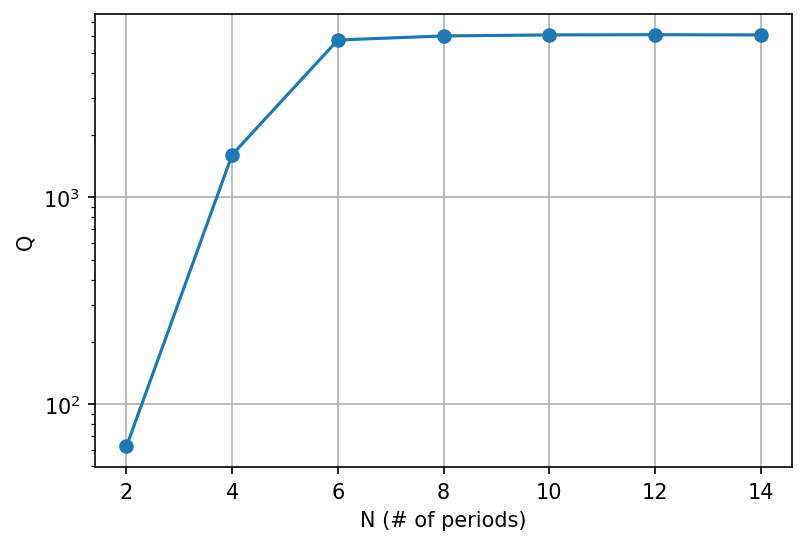

In [25]:
idx = np.zeros(N_vec.shape)
Q_fund = np.zeros(N_vec.shape)
for i in range(N_vec.size):
    idx[i] = np.abs(np.array(f[i]) - 0.234).argmin()
    Q_fund[i] = Q[i][int(idx[i])]

plt.figure(dpi=150)
plt.semilogy(N_vec,Q_fund,'o-')
plt.grid(True)
plt.xlabel('N (# of periods)')
plt.ylabel('Q')
plt.show()

上面顯示的結果正是我們所期望的：首先，𝑄 隨 N 呈指數增長，然後在 𝑄𝑟≈8750 處達到飽和  
現在，𝜔 =0.32823 時的額外模式是什麼?  
這正好在band gap的邊緣附近 有兩種可能性。 首先，它可能是band edge state：當週期性波導中的傳播狀態接近the edge of the gap，它們的群速度變為零，對應於長而有限的晶體中的長壽命共振。   
  
其次，它可能是一種高階諧振模式，對於稍大的defect將被拉入間隙的更遠，但非常delocalized。 在這種情況下，事實證明是後者。   
  
要查看模式，我們將簡單地使用narrow-band source源再次運行模擬，並且我們還將增加 y 單元大小 sy 因為事實證明模式在該方向上相當分散：

In [26]:
sim = sim_cavity(N=16,sy=12,fcen=0.328227374843021,df=0.1)
sim.run(until_after_sources=600)

-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00265384 s
Working in 2D dimensions.
Computational cell is 38.4 x 12 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (1.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-1.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cyli

FloatProgress(value=0.0, description='0% done ', max=700.0)

Meep progress: 263.95/700.0 = 37.7% done in 4.0s, 6.6s to go
on time step 10563 (time=264.075), 0.00037868 s/step
Meep progress: 535.4250000000001/700.0 = 76.5% done in 8.0s, 2.5s to go
on time step 21426 (time=535.65), 0.000368251 s/step
run 0 finished at t = 700.0 (28000 timesteps)


     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (1.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-1.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (2.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-2.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant eps

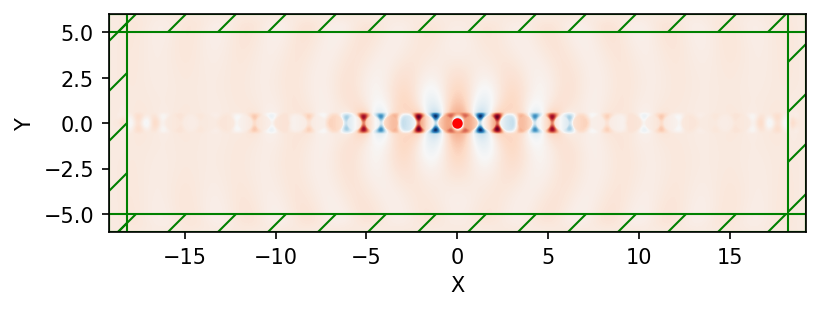

In [27]:
f = plt.figure(dpi=150)
sim.plot2D(ax=f.gca(),fields=mp.Hz)
plt.show()

從圖像中可以看出，該場明顯位於中心defect周圍，而不是像band-edge state那樣均勻地分佈在晶體中。 在defect中，模式比之前的模式更高階。 它在 y 方向上有一對額外的節點。